LIMPIEZA DE DATOS CON PYTHON Y PANDAS
--------------------------------------

1. El problema del negocio

Una entidad bancaria contrata a una empresa de marketing encargada de contactar telefónicamente a posibles clientes para determinar si están interesados o no en adquirir un certificado de depósito a término con el banco.

¿Qué perfil tienen los clientes con mayor potencial de conversión?


In [3]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
ruta = "data/dataset_banco.csv"
data = pd.read_csv(ruta)

In [4]:
print(data.shape)
data.head()

(45215, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


In [5]:
# Para ver las variables categóricas y las numéricas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45215 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45215 non-null  int64  
 1   job        45213 non-null  object 
 2   marital    45214 non-null  object 
 3   education  45214 non-null  object 
 4   default    45215 non-null  object 
 5   balance    45213 non-null  float64
 6   housing    45215 non-null  object 
 7   loan       45215 non-null  object 
 8   contact    45215 non-null  object 
 9   day        45215 non-null  int64  
 10  month      45215 non-null  object 
 11  duration   45214 non-null  float64
 12  campaign   45215 non-null  int64  
 13  pdays      45214 non-null  float64
 14  previous   45215 non-null  int64  
 15  poutcome   45215 non-null  object 
 16  y          45215 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


2. Limpieza

Realizaremos el proceso de limpieza teniendo en cuenta las situaciones más comunes:

    - Datos faltantes en algunas celdas
    - Columnas irrelevantes (que no responden al problema que queremos resolver)
    - Registros (filas) repetidos
    - Valores extremos (outliers) en el caso de las variables numéricas. Se deben analizar en detalle pues no necesariamente la solución es eliminarlos
    - Errores tipográficos en el caso de las variables categóricas

Al final de este proceso, deberíamos tener un set de datos íntegro, listo para la fase de Análisis

In [6]:
# La función 'dropna' elimina las filas donde se encuentren celdas con datos vacíos
# inplace=True --> reescribe el resultado en el mismo set original

data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45207 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45207 non-null  int64  
 1   job        45207 non-null  object 
 2   marital    45207 non-null  object 
 3   education  45207 non-null  object 
 4   default    45207 non-null  object 
 5   balance    45207 non-null  float64
 6   housing    45207 non-null  object 
 7   loan       45207 non-null  object 
 8   contact    45207 non-null  object 
 9   day        45207 non-null  int64  
 10  month      45207 non-null  object 
 11  duration   45207 non-null  float64
 12  campaign   45207 non-null  int64  
 13  pdays      45207 non-null  float64
 14  previous   45207 non-null  int64  
 15  poutcome   45207 non-null  object 
 16  y          45207 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 6.2+ MB


2.2 Una columna irrelevante puede ser:

    - Columna que no contiene información relevante para el problema que queremos resolver
    - Columna categórica pero con un sólo nivel
    - Columna numérica pero con un sólo valor
    - Columnas con información redundante

Si tenemos dudas, lo mejor es dejarla (y más adelante podremos darnos cuenta de si se debe preservar o no)

In [7]:
# Conteo de los niveles en las diferentes columnas categóricas
columns_cat = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

for column in columns_cat:
    print(f'Columna {column}: {data[column].nunique()} subniveles')

Columna job: 18 subniveles
Columna marital: 6 subniveles
Columna education: 10 subniveles
Columna default: 2 subniveles
Columna housing: 2 subniveles
Columna loan: 6 subniveles
Columna contact: 5 subniveles
Columna month: 12 subniveles
Columna poutcome: 6 subniveles
Columna y: 2 subniveles


Todas las columnas categóricas tienen más de 1 subnivel. No eliminaremos ninguna.

Verifiquemos lo que ocurre con las columnas numéricas:

In [8]:
# Con el método 'describe' nos muestra las columnas numéricas
# Si la desviación estándar (std) es exáctamente igual a 0, significa que en esa columna, todos los valores son exáctamente iguales

data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000
mean,41.005596,1374.201318,15.806534,258.032539,2.763731,40.178225,0.580198
std,12.037399,3924.491665,8.323015,257.460759,3.098058,100.103283,2.303341
min,18.000000,-8019.000000,1.000000,-1389.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1427.500000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,776.000000,527532.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


2.3 Filas repetidas

In [9]:
print(f'Tamaño del set antes de eliminar las filas repetidas: {data.shape}')
data.drop_duplicates(inplace=True)
print(f'Tamaño del set después de eliminar las filas repetidas: {data.shape}')

Tamaño del set antes de eliminar las filas repetidas: (45207, 17)
Tamaño del set después de eliminar las filas repetidas: (45203, 17)


2.4 Outliers en las variables numéricas

No siempre se deben eliminar los outliers porque dependiendo de la variable numérica analizada, estos pueden contener información importante

Creamos gráfiicas tipo 'boxplot' de las columnas numéricas:

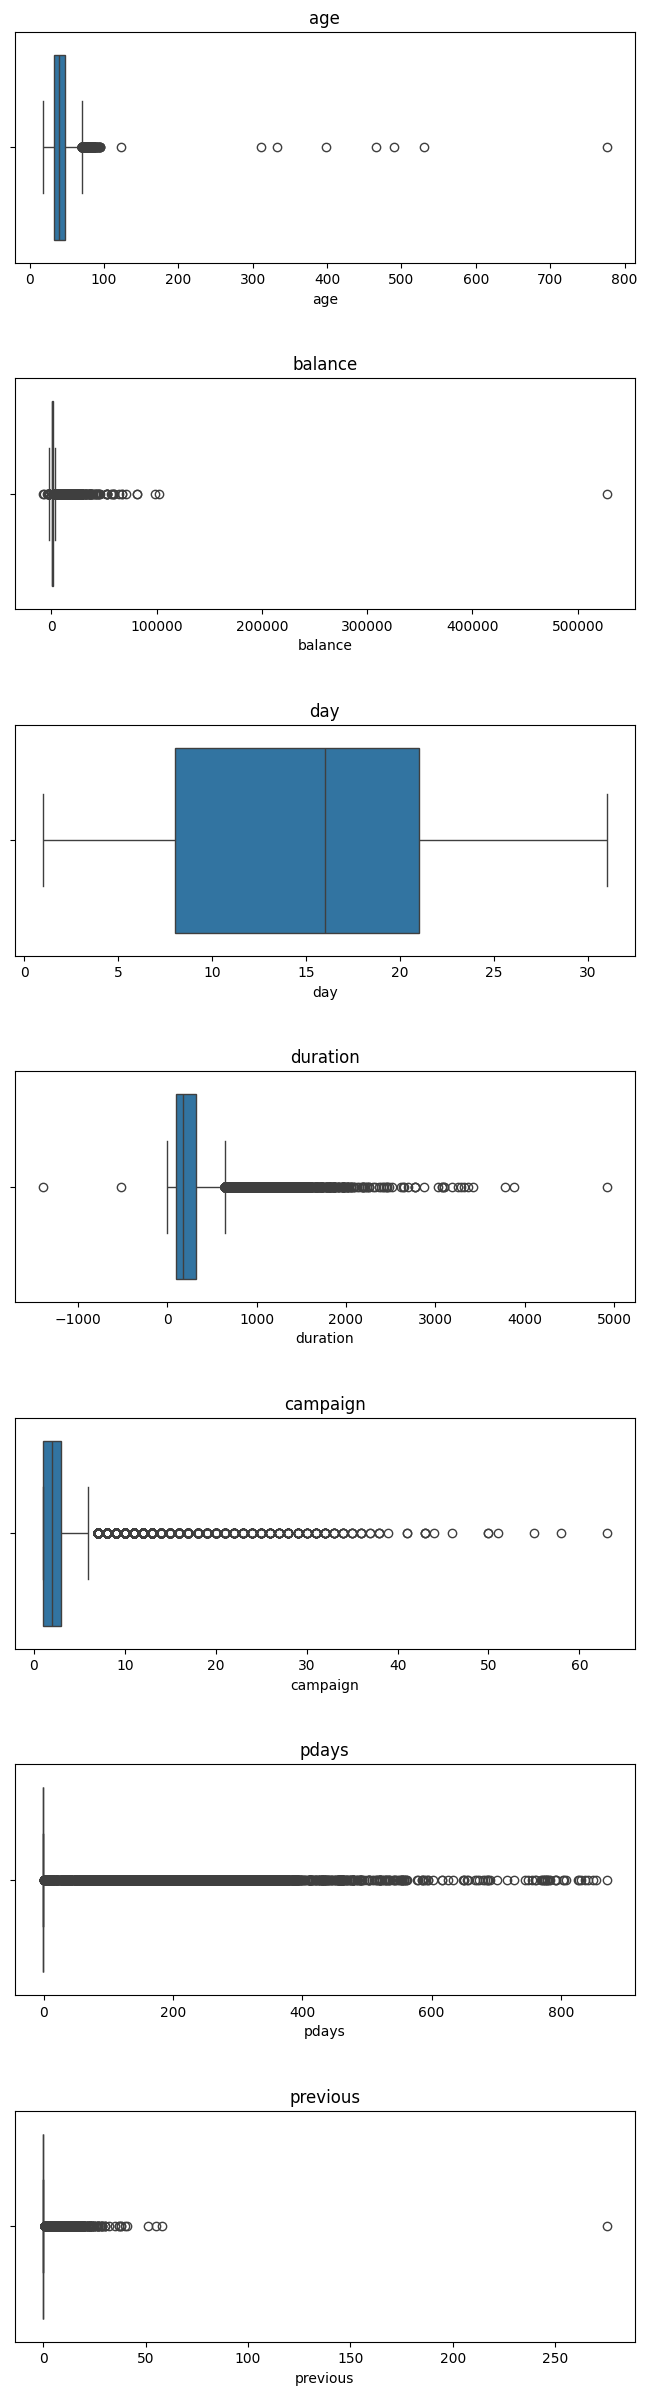

In [10]:
# Generar gráficas individuales pues las variables numéricas están en rangos diferentes
columns_num = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.5)

for i, column in enumerate(columns_num):
    sns.boxplot(x=column, data=data, ax=ax[i])
    ax[i].set_title(column)


Observaciones:

    - 'age': hay usuarios con edades mucho mayores a 100 años
    - 'duration': hay valores negativos
    - 'previous': hay un valor extremadamente algo (cercano a 300)

In [8]:
# Eliminar filas con 'age'>100

print(f'Tamaño del set antes de eliminar registros de edad: {data.shape}')
data = data[data['age']<=100]
print(f'Tamaño del set después de eliminar registros de edad: {data.shape}')

Tamaño del set antes de eliminar registros de edad: (45207, 17)
Tamaño del set después de eliminar registros de edad: (45207, 17)


In [9]:
# Eliminar filas con 'duration'<0

print(f'Tamaño del set antes de eliminar registros de duración: {data.shape}')
data = data[data['duration']>0]
print(f'Tamaño del set después de eliminar registros de duración: {data.shape}')

Tamaño del set antes de eliminar registros de duración: (45207, 17)
Tamaño del set después de eliminar registros de duración: (45201, 17)


In [10]:
# Eliminar filas con 'previous'>100

print(f'Tamaño del set antes de eliminar registros de previous: {data.shape}')
data = data[data['previous']<=100]
print(f'Tamaño del set después de eliminar registros de previous: {data.shape}')

Tamaño del set antes de eliminar registros de previous: (45201, 17)
Tamaño del set después de eliminar registros de previous: (45200, 17)


2.5 Errores tipográficos en variables categóricas

En una variable categórica pueden aparecer subniveles como 'unknown' y 'UNK' que para nosotros son equivalentes pero que para nuestro programa parecerían diferentes

Se deben unificar estos subniveles

C:\Users\Usuario\AppData\Local\Temp\ipykernel_9100\1930130428.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_9100\1930130428.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_9100\1930130428.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_9100\1930130428.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax

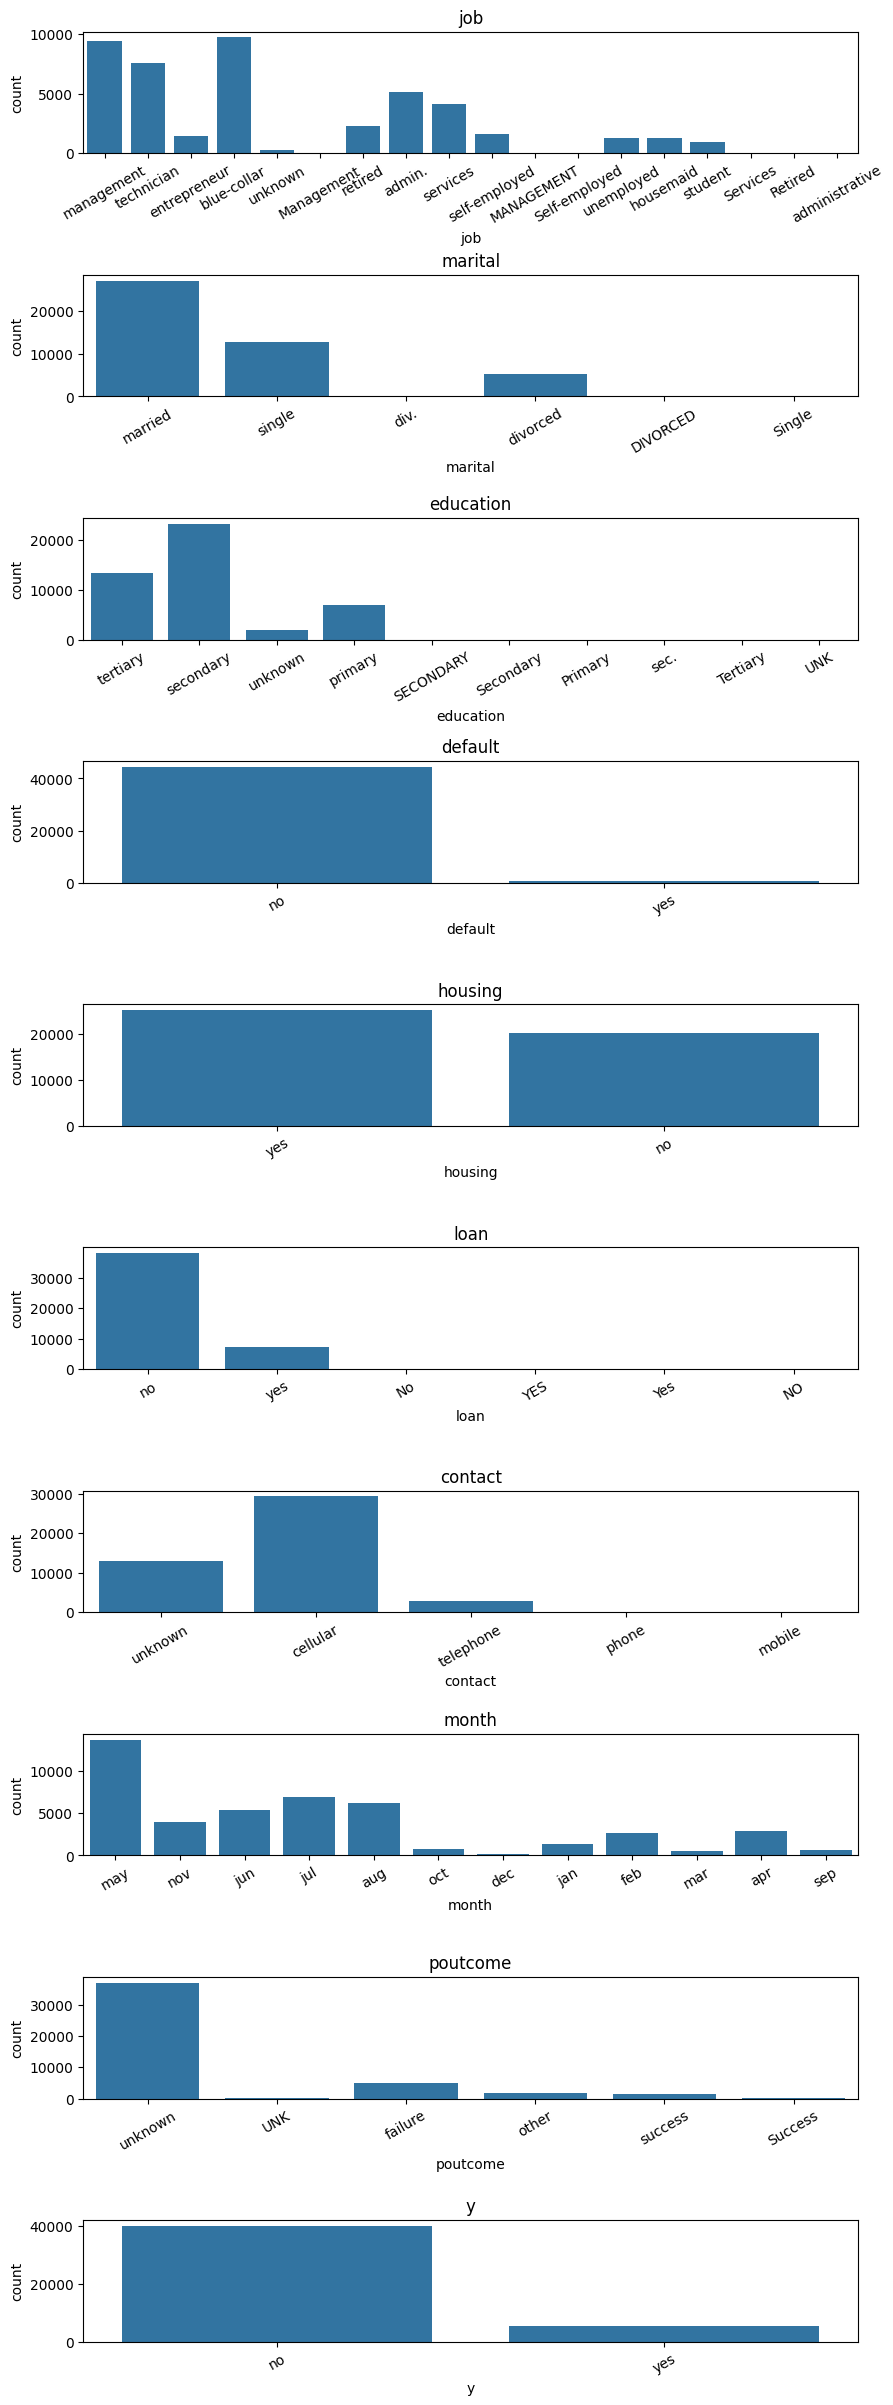

In [5]:
# Graficar los subniveles de cada variable categórica

columns_cat = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(10, 30))
fig.subplots_adjust(hspace=1)

for i, column in enumerate(columns_cat):
    sns.countplot(x=column, data=data, ax=ax[i])
    ax[i].set_title(column)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)

Inicialmente se observa que hay subniveles con el mismo nombre pero escritos en minúscula, en mayúscula o con la primera letra en mayúscula

Unifiquemos estos subniveles inicialmente:

C:\Users\Usuario\AppData\Local\Temp\ipykernel_29444\2095584820.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_29444\2095584820.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_29444\2095584820.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_29444\2095584820.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabel

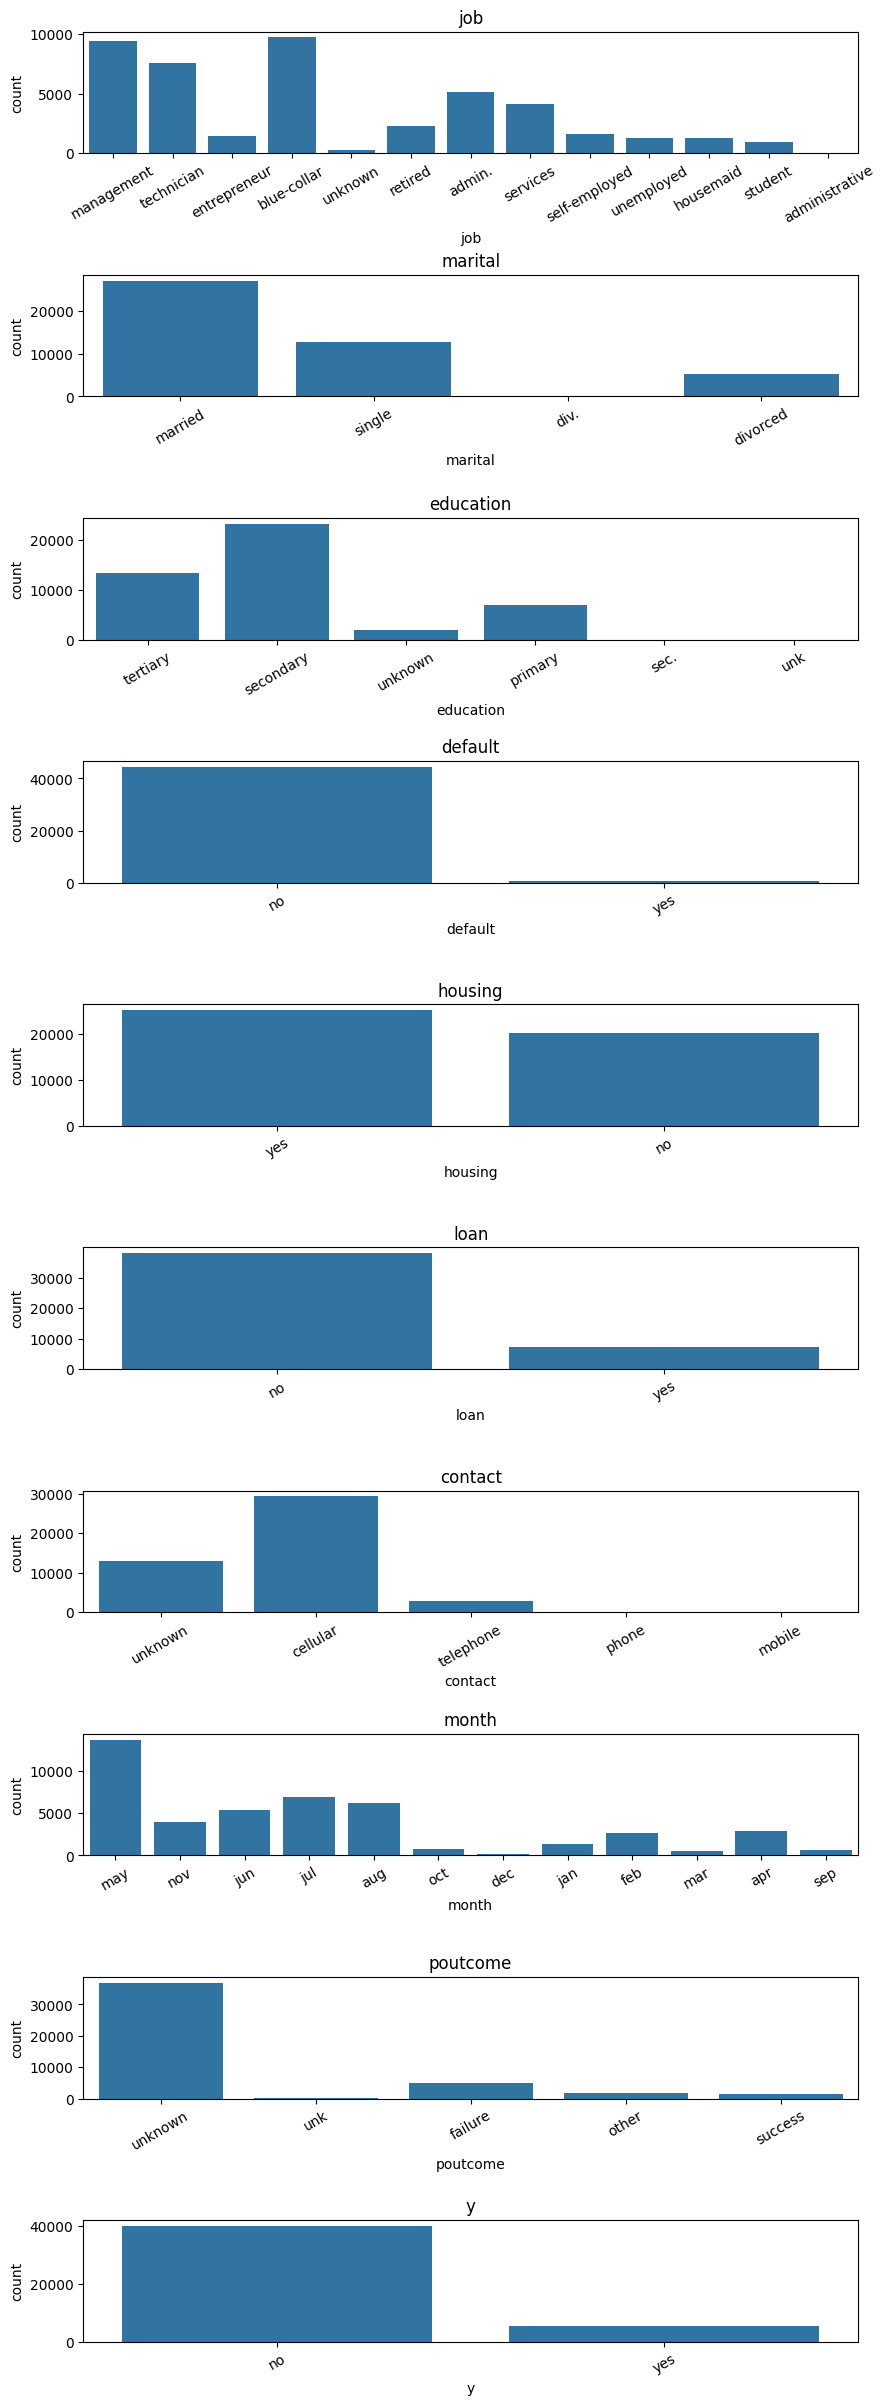

In [14]:
for column in data.columns:
    # Representar en minúsculas sólo si la columna es categórica:
    if column in columns_cat:
        data[column] = data[column].str.lower()

# Y generamos las gráficas nuevamente
fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(10, 30))
fig.subplots_adjust(hspace=1)

for i, column in enumerate(columns_cat):
    sns.countplot(x=column, data=data, ax=ax[i])
    ax[i].set_title(column)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)

In [16]:
# 'job': unificar 'admin.' y 'administrative'

print(data['job'].unique())
data['job'] = data['job'].str.replace('admin.', 'administrative', regex=False)
print(data['job'].unique())

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'administrative' 'services' 'self-employed' 'unemployed'
 'housemaid' 'student' nan]
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'administrative' 'services' 'self-employed' 'unemployed'
 'housemaid' 'student' nan]


In [17]:
# 'marital': unificar 'div.' y 'divorced'

print(data['marital'].unique())
data['marital'] = data['marital'].str.replace('div.', 'divorced', regex=False)
print(data['marital'].unique())

['married' 'single' 'div.' 'divorced' nan]
['married' 'single' 'divorced' nan]


In [19]:
# 'education': unificar 'sec.' y 'secondary', 'unk' y 'unknown'

print(data['education'].unique())
data['education'] = data['education'].str.replace('sec.', 'secondary', regex=False)
data[data['education']=='unk'] = 'unknown'
print(data['education'].unique())

['tertiary' 'secondary' 'unknown' 'primary' 'unk' nan]
['tertiary' 'secondary' 'unknown' 'primary' nan]


C:\Users\Usuario\AppData\Local\Temp\ipykernel_29444\3823962060.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'unknown' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data[data['education']=='unk'] = 'unknown'
C:\Users\Usuario\AppData\Local\Temp\ipykernel_29444\3823962060.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data[data['education']=='unk'] = 'unknown'


In [20]:
# 'contact': unificar 'telephone' y 'phone'

print(data['contact'].unique())
data[data['contact']=='phone'] = 'telephone'
print(data['contact'].unique())

['unknown' 'cellular' 'telephone' 'phone' 'mobile']
['unknown' 'cellular' 'telephone' 'mobile']


In [21]:
# 'poutcome': unificar 'unk' y 'unknown'

print(data['poutcome'].unique())
data[data['poutcome']=='unk'] = 'unknown'
print(data['poutcome'].unique())

['unknown' 'unk' 'failure' 'other' 'success' 'telephone']
['unknown' 'failure' 'other' 'success' 'telephone']


In [22]:
data.shape

(45200, 17)

Listo, ya hemos realizado la limpieza de nuestro set de datos!

Generalmente esta limpieza de datos implica el manejo de datos faltantes o repetidos, así como el manejo de valores extremos.

El dataset resultante tiene 45.200 filas y 17 columnas.

El set de datos ya está listo para el Análisis Exploratorio.

In [23]:
ruta = "data/dataset_banco_limpio.csv"
data.to_csv(ruta)